Mauricio Sevilla  05.20

This notebook solves the Poisson equation on a square lattice.

$$
\nabla^2 \varphi = \frac{\rho}{\epsilon_0}
$$

So this solves the problem of the electrical potential if we apply $\rho$ as boundary conditions, considering the density to be independent of time.


- In 2 Dimensions
- Discretization of space
- Finite differences


---
So, let us consider the problem in the box with Dirichlet boundary conditions, so that we have that 

$$
\varphi(\text{Boundary})=Cte.
$$

The method we are going to implement, is one such that the new value of the potential on a given position on the grid, is given as the average of its first neighbors.

$$
\varphi_{t+1}(i,j)=\frac{1}{4}\left[\varphi_{t}(i+1,j)+\varphi_{t}(i-1,j)+\varphi_{t}(i,j+1)+\varphi_{t}(i,j-1)\right]
$$

In [11]:
import numpy as np
import matplotlib.pylab as plt

Let us explain it better,

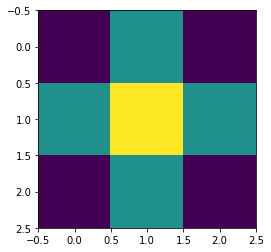

In [13]:
matrix=np.zeros((3,3))

matrix[1,1]=2
matrix[2,1]=1
matrix[1,2]=1
matrix[0,1]=1
matrix[1,0]=1

plt.imshow(matrix)

So, in principle, we get the yellow value by averaging the green ones.

Let us start from a random initial state

In [14]:
mat=2*np.random.random((50,50))-1

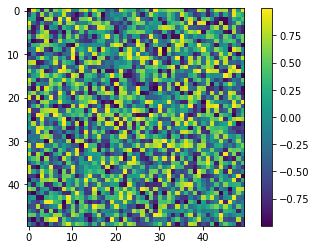

In [4]:
pl=plt.imshow(mat)
plt.colorbar(pl)

- We need some Boundary Conditions, let us choose the borders as zero


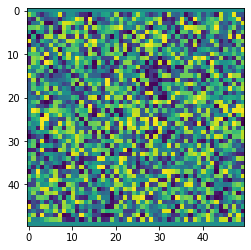

In [15]:
mat[0,:]=0
mat[-1,:]=0
plt.imshow(mat)

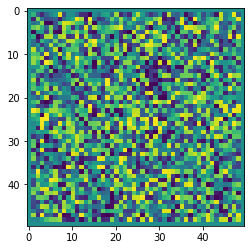

In [17]:
mat[:,0]=0
mat[:,-1]=0
plt.imshow(mat)

Now, to do the method in such a way that is clear but not very efficient, so let us repeat the averaging process we already described, let us say 500 times, and save that on the matrix `copy` and let us calculate the variance between per pixel each timestep as a measure of _error_ on the stabilization.

The boundary conditions here chosen are just two parallel plates

0.39051020460724084
0.0012071068102034418
0.00039360065701495657
0.000265738635933221
0.0002245440144237791
0.00020653216804568375
0.00019741216417825313
0.00019233926551116118
0.00018932232768713018
0.0001874402269781998


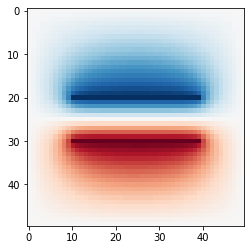

In [19]:
mat=2*np.random.random((50,50))-1
for t in range(500):
    copy=np.zeros(mat.shape)
    for i in range(1,len(copia)-1):
        for j in range(1,len(copia)-1):
            copy[i,j]=(mat[i+1,j]+mat[i-1,j]+mat[i,j+1]+mat[i,j-1])/4.
    if t%50==0: print(((mat-copy)**2).sum()/(50*50))
    mat=copy.copy()
    mat[20,10:40]=1
    mat[30,10:40]=-1

plt.imshow(mat,cmap='RdBu',vmin=-1,vmax=1)

Now, let us make the program better, more efficient.

First, let us create a geometry function. Here we are using a set of randomly distributed charges

In [21]:
x_pos=np.random.randint(5,95,8)
y_pos=np.random.randint(5,95,8)

x_neg=np.random.randint(5,95,7)
y_neg=np.random.randint(5,95,7)

def geometry(mat):
    mat[:,0]=0
    mat[:,-1]=0
    mat[0,:]=0
    mat[-1,:]=0
    mat[x_pos,y_pos]=1
    mat[x_neg,y_neg]=-1

And then, we define a function that calculates the time evolution of the complete matrix and the variance as we told before but using the vectorization `numpy` offers, so that it returns both things

In [22]:
def time_step(mat):
    copia=np.zeros(mat.shape)
    copia[1:-1,1:-1]=(mat[2:,1:-1]+mat[0:-2,1:-1]+mat[1:-1,2:]+mat[1:-1,:-2])/4.
    geometry(copia)
    diff=(np.sqrt((mat-copia)**2).sum()/(100*100))
    return diff,copia

Now, we are able to run way larger simulations, in less time. Let us see that running the simulation until stabilization or 500000 timesteps, for a 100 times 100 matrix

0 0.5489385071383331
5000 3.2849593926745557e-05
10000 5.4890315809062e-07
15000 9.205418667860332e-09
20000 1.5438746579579203e-10
25000 2.58928862597891e-12
30000 4.3428598321614234e-14
35000 7.098346026636684e-16
38773 0.0


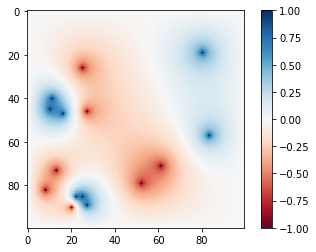

In [24]:
mat=2*np.random.random((100,100))-1
for t in range(500000):
    diff,mat=time_step(mat)
    if t%5000==0:
        print(t,diff)
    if diff==0.0:
        print(t,diff)
        break
        
pl=plt.imshow(mat,cmap='RdBu',vmin=-1,vmax=1)
plt.colorbar(pl)
plt.show()